In [180]:
import pandas as pd
import numpy as py
df = pd.read_excel('~/Desktop/python/shopee/train.xlsx', index_col=0).reset_index()

In [181]:
df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [182]:
df['checkout_count_last_60_days']=df['checkout_count_last_60_days'].apply(lambda x: x/60)
df['checkout_count_last_60_days']

0        0.166667
1        0.066667
2        0.450000
3        0.100000
4        0.000000
           ...   
73534    0.000000
73535    0.000000
73536    0.000000
73537    0.000000
73538    0.000000
Name: checkout_count_last_60_days, Length: 73539, dtype: float64

In [183]:
df['last_checkout_day']=df['last_checkout_day'].replace("Never checkout",'0').astype('int')
df['last_checkout_day']

0         18
1          8
2          5
3         53
4        221
        ... 
73534    279
73535     51
73536      0
73537      0
73538      0
Name: last_checkout_day, Length: 73539, dtype: int64

In [184]:
df['last_login_day']=df['last_login_day'].replace("Never login",'0').astype('int')
df['last_login_day']

0         6
1         4
2         5
3         9
4         6
         ..
73534    36
73535    10
73536     0
73537    34
73538     3
Name: last_login_day, Length: 73539, dtype: int64

In [191]:
rfl=df[['user_id','last_checkout_day','checkout_count_last_60_days','last_login_day','open_count_last_60_days']].reset_index()
# Rename columns for easier interpretation
rfl.rename(columns = {'last_checkout_day': 'Recency'
,'checkout_count_last_60_days': 'Frequency',
'last_login_day': 'login'}, inplace=True)
rfl


,index,user_id,Recency,Frequency,login,open_count_last_60_days
0,0,43,18,0.166667,6,4
1,1,102,8,0.066667,4,17
2,2,177,5,0.450000,5,12
3,3,184,53,0.100000,9,1
4,4,221,221,0.000000,6,0
...,...,...,...,...,...,...
73534,73534,127613,279,0.000000,36,1
73535,73535,127620,51,0.000000,10,1
73536,73536,127696,0,0.000000,0,0
73537,73537,127807,0,0.000000,34,4


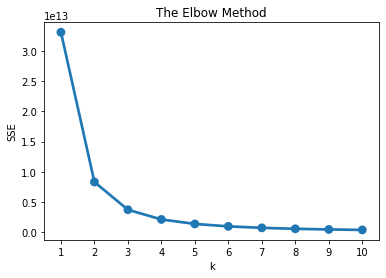

In [192]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfl.drop("user_id",axis=1))
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [193]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(rfl.drop('user_id',axis=1))

KMeans(n_clusters=4, random_state=1)

In [194]:
cluster_labels = kmeans.labels_
final= rfl.assign(Cluster = cluster_labels)

In [195]:
final

,index,user_id,Recency,Frequency,login,open_count_last_60_days,Cluster
0,0,43,18,0.166667,6,4,2
1,1,102,8,0.066667,4,17,2
2,2,177,5,0.450000,5,12,2
3,3,184,53,0.100000,9,1,2
4,4,221,221,0.000000,6,0,2
...,...,...,...,...,...,...,...
73534,73534,127613,279,0.000000,36,1,0
73535,73535,127620,51,0.000000,10,1,0
73536,73536,127696,0,0.000000,0,0,0
73537,73537,127807,0,0.000000,34,4,0


In [196]:
final.to_csv("rfl_new.csv")